# Can we find a finite duration signal that can be perfectly reconstructed from its decimated form?

The aim of this sheet is to find a signal that can be perfectly reconstructed from its decimated form.

Starting with a signal $x[n]$, where $n=0,1,\ldots,N-1$, can we filter it, decimate it, 
then interpolate it to get back $x[n]$ or its filtered version?

Let's say that filtering generates:

$$y[n] = h[n] \star x[n]$$

and then the decimation is

$$y_d[m] = y[2m]$$

where $m = 0, 1, \ldots, N/2$ (and assume that $N$ is even so that N/2 is an integer).

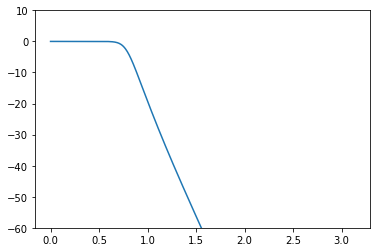

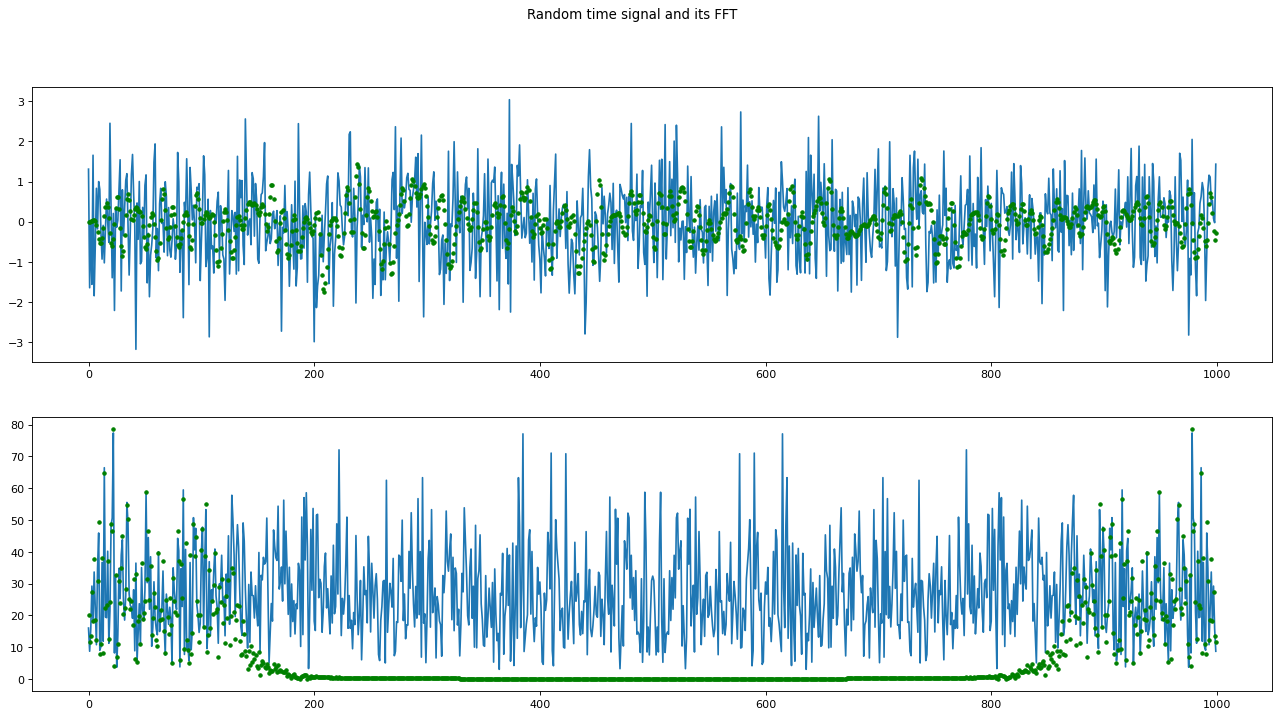

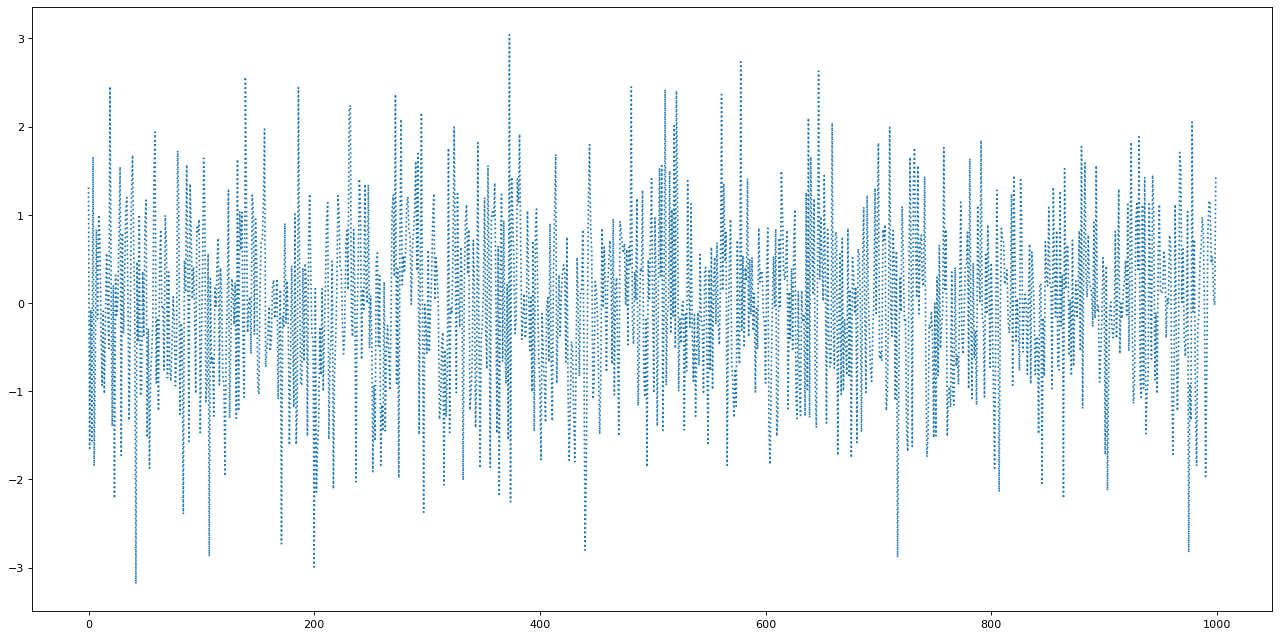

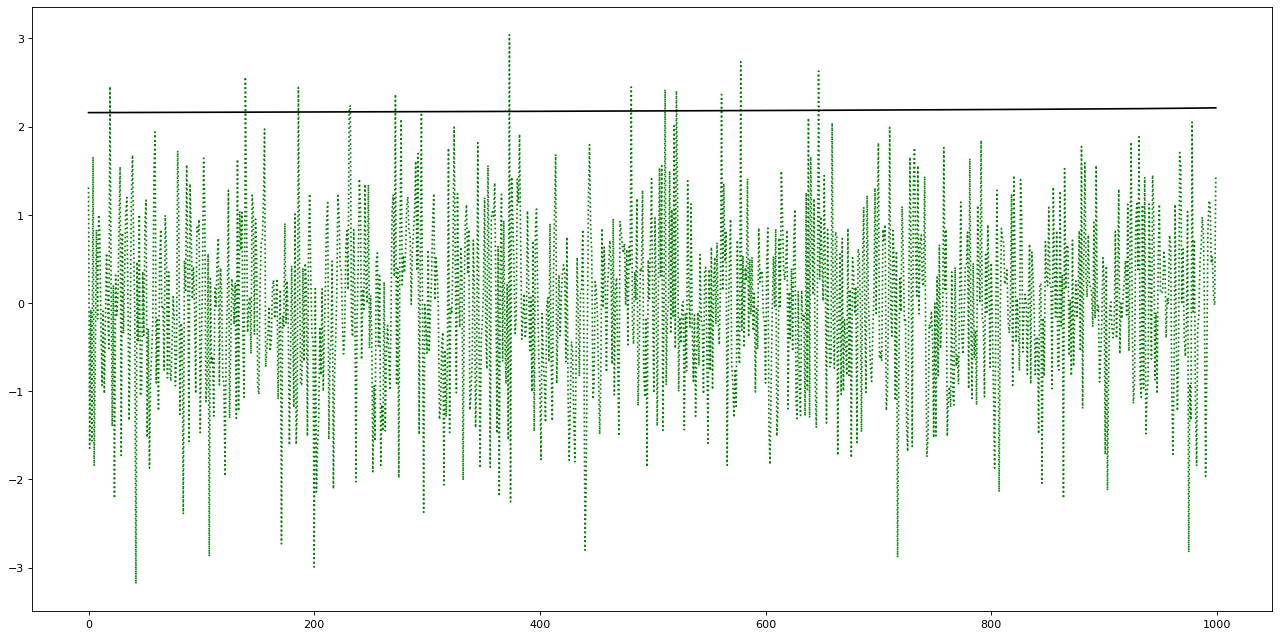

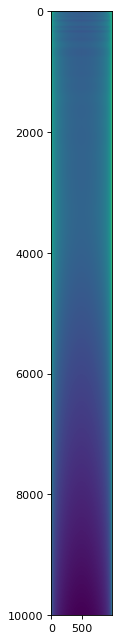

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import butter, lfilter, filtfilt, freqz

def decimate_interpolate(x,M,b,a):
    y = filtfilt(b, a, x)
    z = y[1:len(y):M]
    alpha = [0]*M*len(z)
    alpha[1:M*len(z):M] = z
    t_z = np.arange(len(z))
    interpolator = interp1d(t_z,z)
    t_beta = np.linspace(0,len(z)-1,M*len(z))
    beta = interpolator(t_beta)
    
    return beta


T = 1000
M = 2
omega_stop = 1/M/2
b, a = butter(8, omega_stop, btype='low', analog=False)
w, h = freqz(b,a)

plt.plot(w,20*np.log10(np.abs(h)))
plt.ylim([-60,10])

np.random.seed(12348)
x = np.random.normal(0,1,T)
y = lfilter(b, a, x)
X = np.abs(np.fft.fft(x))
Y = np.abs(np.fft.fft(y))

fig, axs = plt.subplots(2, figsize=(20, 10), dpi=80)
fig.suptitle('Random time signal and its FFT')
axs[0].plot(x)
axs[0].plot(y, "g.")
axs[1].plot(X)
axs[1].plot(Y, "g.")


plt.figure(figsize=(20, 10), dpi=80)
plt.plot(x, ':')

# Now let's do each one lots of times
spectra = [X.copy()]
for count in np.arange(10000):
    xx = x.copy()
    for iterations in np.arange(count+1):
        xx = decimate_interpolate(xx, M, b, a)
    
    # plt.plot(xx)
    spectra.append(np.abs(np.fft.fft(xx)))

plt.figure(figsize=(20, 10), dpi=80)
plt.plot(x, 'g:')
plt.plot(xx, 'k')

plt.figure(figsize=(20, 10), dpi=80)
plt.imshow(np.log(spectra))


In [17]:
import datetime;
  
# ct stores current time
ct = datetime.datetime.now()
print("current time:-", ct)
  
# ts store timestamp of current time
ts = ct.timestamp()

plt.imsave('finite_energy_' + str(ts) + '.jpg', np.log(spectra))

current time:- 2022-07-06 14:12:13.761455
